In [1]:
# 3.1KNN
"""
KNN（K-Nearest Neighbors）是一种十分有效且易掌握的机器学习算法
国际权威学术会议ICDM曾在2006年评选出数据挖掘十大经典算法
KNN便是其中之一。KNN的算法思想用一句比较通俗的话来讲就是“近朱者赤，近墨者黑”
即同一类事物通常在很多方面都很接近。
例如，金丝猴可以分为黔金丝猴、川金丝猴等多种类别
同一类别的金丝猴会具有一些相似的特征，如毛发颜色、体型大小、尾巴长度等
因此可以通过这些特征来判断金丝猴的种类。KNN就是利用了这一特性
假如存在一个样本数据集，数据集中的每个样本都标记了所属的类别
对于一个未知类别的样本，KNN会先将其与样本集中数据的特征进行比较，然后返回最邻近（最相似）的数据的类别
"""
# 特征空间中的一个样本，如果与其最相似的k个样本中的大部分属于某个类别，则该样本也属于该类别

'\nKNN（K-Nearest Neighbors）是一种十分有效且易掌握的机器学习算法\n国际权威学术会议ICDM曾在2006年评选出数据挖掘十大经典算法\nKNN便是其中之一。KNN的算法思想用一句比较通俗的话来讲就是“近朱者赤，近墨者黑”\n即同一类事物通常在很多方面都很接近。\n例如，金丝猴可以分为黔金丝猴、川金丝猴等多种类别\n同一类别的金丝猴会具有一些相似的特征，如毛发颜色、体型大小、尾巴长度等\n因此可以通过这些特征来判断金丝猴的种类。KNN就是利用了这一特性\n假如存在一个样本数据集，数据集中的每个样本都标记了所属的类别\n对于一个未知类别的样本，KNN会先将其与样本集中数据的特征进行比较，然后返回最邻近（最相似）的数据的类别\n'

In [2]:
# 1)计算测试样本与训练集中所有（或大部分）样本的距离
# 该距离可以是欧氏距离、余弦距离等，较常用的是欧氏距离

In [3]:
# 2)找到步骤1中距离最短的k个样本，作为预测样本的邻居

In [4]:
# 3)对于分类问题，通过投票机制选出k个邻居中最多的类别作为预测样本的预测值
# 对于回归问题，则采用k个邻居的平均值。

In [5]:
# KNN的优点：简单有效，易于实现；无须训练（或训练很快）。
# KNN的缺点：懒惰算法，数据集的样本容量大时计算量比较大，评分慢；样本不平衡时，预测偏差比较大。

In [6]:
# 3.1.2 用KNN预测鸢尾花品种
import pandas as pd
"""
·萼片长度（sepal_length）
·萼片宽度（sepal_width）
·花瓣长度（petal_length）
·花瓣宽度（petal_width）
"""

'\n·萼片长度（sepal_length）\n·萼片宽度（sepal_width）\n·花瓣长度（petal_length）\n·花瓣宽度（petal_width）\n'

In [7]:
# 读取数据
data_url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data'
iris_data = pd.read_csv(
    data_url,
    sep=",", 
    names=['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'class']
)
# iris_data = pd.load_iris()

In [8]:
iris_data.head(10)

,sepal_length,sepal_width,petal_length,petal_width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
5,5.4,3.9,1.7,0.4,Iris-setosa
6,4.6,3.4,1.4,0.3,Iris-setosa
7,5.0,3.4,1.5,0.2,Iris-setosa
8,4.4,2.9,1.4,0.2,Iris-setosa
9,4.9,3.1,1.5,0.1,Iris-setosa


In [9]:
# 准备做图
from matplotlib import pyplot as plt

In [12]:
# 柱状图显示组平均数
# 可以从图上看吹不同品种的属性特点
# 把不同的品种分成不同的组，3组
grouped_data = iris_data.groupby("class")
grouped_data

In [13]:
# 求组平均值
group_mean = grouped_data.mean()
group_mean

,sepal_length,sepal_width,petal_length,petal_width
class,,,,
Iris-setosa,5.006,3.418,1.464,0.244
Iris-versicolor,5.936,2.770,4.260,1.326
Iris-virginica,6.588,2.974,5.552,2.026


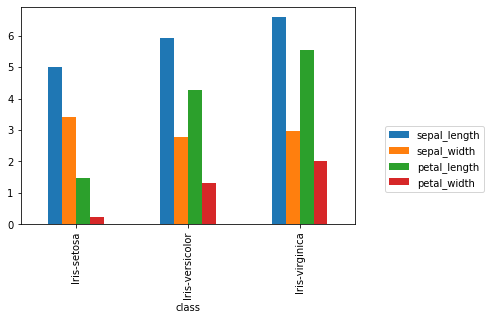

In [14]:
# 绘图
group_mean.plot(kind="bar")
plt.legend(loc="center right", bbox_to_anchor=(1.4, 0.3), ncol=1)
plt.show()

In [15]:
# 我们至少要一个训练集来训练模型
# 一个测试机来检验模型对新样本的预测能力

In [16]:
import numpy as np
# 生成一个随机数并选择小于0.8的数据
msk = np.random.rand(len(iris_data)) < 0.8

train_data_origin = iris_data[msk]
test_data_origin = iris_data[~msk]
train_data_origin

,sepal_length,sepal_width,petal_length,petal_width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
5,5.4,3.9,1.7,0.4,Iris-setosa
6,4.6,3.4,1.4,0.3,Iris-setosa
...,...,...,...,...,...
141,6.9,3.1,5.1,2.3,Iris-virginica
142,5.8,2.7,5.1,1.9,Iris-virginica
143,6.8,3.2,5.9,2.3,Iris-virginica
145,6.7,3.0,5.2,2.3,Iris-virginica


In [17]:
test_data_origin

,sepal_length,sepal_width,petal_length,petal_width,class
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
14,5.8,4.0,1.2,0.2,Iris-setosa
15,5.7,4.4,1.5,0.4,Iris-setosa
32,5.2,4.1,1.5,0.1,Iris-setosa
41,4.5,2.3,1.3,0.3,Iris-setosa
42,4.4,3.2,1.3,0.2,Iris-setosa
46,5.1,3.8,1.6,0.2,Iris-setosa
52,6.9,3.1,4.9,1.5,Iris-versicolor
55,5.7,2.8,4.5,1.3,Iris-versicolor
